# Torch basics

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np

In [0]:
torch.__version__

'1.4.0'

Largely inspired from the tutorial [What is PyTorch?](https://pytorch.org/tutorials/beginner/former_torchies/tensor_tutorial.html)

Tensors are used to encode the signal to process, but also the internal states and parameters of models.

Manipulating data through this constrained structure allows to use CPUs and GPUs at peak performance.



## Tensors

Construct a 3x5 matrix, uninitialized:

In [0]:
# Sets the default floating point dtype. 
# This type will be used as default floating point type for type inference in torch.tensor().
torch.set_default_tensor_type('torch.FloatTensor') 

In [0]:
# Empty means that it's not initialized, and its values are arbitrary based on the current value of the memory 
x = torch.empty(3,5)
print(x.type())
print(x)

torch.FloatTensor
tensor([[7.8670e-37, 0.0000e+00, 4.4842e-44, 0.0000e+00,        nan],
        [0.0000e+00, 2.1494e-04, 6.7356e+22, 5.4166e-05, 4.2492e-05],
        [1.0616e+21, 5.3369e-08, 6.5191e-10, 2.6831e-09, 6.0912e-13]])


In [0]:
x = torch.randn(3,5)
print(x)

tensor([[ 1.4609,  0.0714, -1.0248,  0.2020, -0.3315],
        [ 2.2452,  0.1899,  0.6004,  1.0914, -0.6800],
        [ 0.1416,  0.2667,  0.0491, -0.6760,  0.5975]])


In [0]:
print(x.size())

torch.Size([3, 5])


torch.Size is in fact a [tuple](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences), so it supports the same operations.

In [0]:
x.size()[1]

5

In [0]:
x.size() == (3,5)

True

Importance of the brackets when defining a tensor

In [0]:
a = torch.tensor([2.0])
print(type(a))
print(a.dtype)
print(a.size())

b = torch.tensor(2.0)
print(type(b))
print(b.dtype)
print(b.size())

<class 'torch.Tensor'>
torch.float32
torch.Size([1])
<class 'torch.Tensor'>
torch.float32
torch.Size([])


In [0]:
print("*************** IMPORTANT ***************")
print("a: ", a, " a 1x1 matrix with dimension 1 ") 
print("b: ", b, " a scalar with no dimension ")

*************** IMPORTANT ***************
a:  tensor([2.])  a 1x1 matrix with dimension 1 
b:  tensor(2.)  a scalar with no dimension 


Select some columns

In [0]:
cols = torch.zeros(5, dtype=torch.bool)
print(cols)
cols[1] = True
cols[4] = True
print(cols)
c = x[:, cols]  # selects all rows, 4th column and  5th column from a
print(c)

tensor([False, False, False, False, False])
tensor([False,  True, False, False,  True])
tensor([[ 0.0714, -0.3315],
        [ 0.1899, -0.6800],
        [ 0.2667,  0.5975]])


In [0]:
# it creates a matrix of zeros with one dimension
torch.zeros(5)

tensor([0., 0., 0., 0., 0.])

All operations on the tensor that operate in-place on it will have an _ postfix. 

In [0]:
# x will be filled with the value 3.5
x.fill_(3.5)
print(x)

tensor([[3.5000, 3.5000, 3.5000, 3.5000, 3.5000],
        [3.5000, 3.5000, 3.5000, 3.5000, 3.5000],
        [3.5000, 3.5000, 3.5000, 3.5000, 3.5000]])


## Bridge to numpy

Used to transform tensors in numpyt to be able to do some transformation in Python eg. Matplotlib

In [0]:
y = x.numpy()
print(y)

[[3.5 3.5 3.5 3.5 3.5]
 [3.5 3.5 3.5 3.5 3.5]
 [3.5 3.5 3.5 3.5 3.5]]


In [0]:
a = np.ones(5)
print(a)
print(type(a))
# transforms "a" in tensor "b"
b = torch.from_numpy(a)
print(b)
 

[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [0]:
xr = torch.randn(3, 5)
a = np.ones(5).astype(int)
print(a)
print(type(a))
b = torch.from_numpy(a)
print(xr)
print(b)

[1 1 1 1 1]
<class 'numpy.ndarray'>
tensor([[-1.2924,  0.9889, -0.8274,  0.4356, -0.8070],
        [ 0.5888,  0.0029,  1.1720,  0.9433, -0.5264],
        [ 0.7490,  1.5298, -0.4614, -1.1126,  0.2778]])
tensor([1, 1, 1, 1, 1])


### Question: print the type of the content (data) of variables a, b and xr

In [0]:
# COMPLETE THE CELL
# A tensor is a complex unit of information
print("a: ",a.dtype, " a numpy array")
print("b: ", b.dtype," a tensor")
print("xr: ",xr.dtype, " a tensor")


a:  int64  a numpy array
b:  torch.int64  a tensor
xr:  torch.float32  a tensor


## Operations

There are multiple syntaxes for operations. In the following
example, we will take a look at the addition operation.

Addition: syntax 1

In [0]:
x = torch.rand(5, 3) 
y = torch.rand(5, 3)
print(x + y)

tensor([[0.4522, 0.5393, 1.1201],
        [1.4474, 1.0410, 0.9743],
        [1.2238, 1.3020, 1.3213],
        [1.3115, 1.3312, 1.3616],
        [1.3242, 0.8750, 0.8247]])


Addition: syntax 2

In [0]:
print(torch.add(x, y))

tensor([[0.4522, 0.5393, 1.1201],
        [1.4474, 1.0410, 0.9743],
        [1.2238, 1.3020, 1.3213],
        [1.3115, 1.3312, 1.3616],
        [1.3242, 0.8750, 0.8247]])


Addition: providing an output tensor as argument

In [0]:
# Using out we define the tensor that will store the result
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[0.4522, 0.5393, 1.1201],
        [1.4474, 1.0410, 0.9743],
        [1.2238, 1.3020, 1.3213],
        [1.3115, 1.3312, 1.3616],
        [1.3242, 0.8750, 0.8247]])


Addition: in-place

In [0]:
# To save memory the result is stored in y
# adds x to y
y.add_(x)
print(y)

tensor([[0.4522, 0.5393, 1.1201],
        [1.4474, 1.0410, 0.9743],
        [1.2238, 1.3020, 1.3213],
        [1.3115, 1.3312, 1.3616],
        [1.3242, 0.8750, 0.8247]])


**Note:** Any operation that mutates a tensor in-place is post-fixed with an ``_``.
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.



Any operation that mutates a tensor in-place is post-fixed with an ```_```

For example: ```x.copy_(y)```, ```x.t_()```, will change ```x```.

In [0]:
print(x.t())

tensor([[0.2539, 0.8298, 0.9642, 0.9931, 0.7970],
        [0.2559, 0.9282, 0.8329, 0.7148, 0.6360],
        [0.9267, 0.0204, 0.3884, 0.4885, 0.3284]])


In [0]:
print(x)

tensor([[0.2539, 0.2559, 0.9267],
        [0.8298, 0.9282, 0.0204],
        [0.9642, 0.8329, 0.3884],
        [0.9931, 0.7148, 0.4885],
        [0.7970, 0.6360, 0.3284]])


In [0]:
x.t_()
print(x)

tensor([[0.2539, 0.8298, 0.9642, 0.9931, 0.7970],
        [0.2559, 0.9282, 0.8329, 0.7148, 0.6360],
        [0.9267, 0.0204, 0.3884, 0.4885, 0.3284]])


You can use standard NumPy-like indexing with all bells and whistles!

In [0]:
print(x[:, 1])

tensor([0.8298, 0.9282, 0.0204])


Resizing (very useful): If you want to resize/reshape tensor, you can use ``torch.view``:

In [0]:
x = torch.randn(4, 4)
print(x)
y = x.view(16)
print(y)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(z)
print(x.size(), y.size(), z.size())

tensor([[ 0.3832, -0.4140, -0.0283, -0.3309],
        [-0.2948, -0.5160,  0.1073,  1.0388],
        [ 0.0510,  0.4278, -2.1625,  0.1641],
        [ 1.5333, -0.2309, -2.9676,  0.9650]])
tensor([ 0.3832, -0.4140, -0.0283, -0.3309, -0.2948, -0.5160,  0.1073,  1.0388,
         0.0510,  0.4278, -2.1625,  0.1641,  1.5333, -0.2309, -2.9676,  0.9650])
tensor([[ 0.3832, -0.4140, -0.0283, -0.3309, -0.2948, -0.5160,  0.1073,  1.0388],
        [ 0.0510,  0.4278, -2.1625,  0.1641,  1.5333, -0.2309, -2.9676,  0.9650]])
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number

In [0]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.6155])
-0.6155474185943604


**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc.,
  are described
  [here](https://pytorch.org/docs/torch).

## 3D Tensors

### Question: What is the size of the following tensor?

**Answer:**

(3, 2, 3) - representing 3 matrices, each one with matrices (2, 3)

In [0]:
y = torch.tensor([
     [
       [1, 2, 3],
       [4, 5, 6]
     ],
     [
       [1, 2, 3],
       [4, 5, 6]
     ],
     [
       [1, 2, 3],
       [4, 5, 6]
     ]
   ])
print(y)

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]])


In [0]:
# COMPLETE THE CELL
# The first dimension is the number of matrices, the second the number of rows and the third the number of columns
print(y.size())

torch.Size([3, 2, 3])


### Question: Explain the result of the next cell

**Answer: **

The function sum returns the sum of each row of the input tensor, returning a tensor with two rows and three cols.


In [0]:
torch.sum(y, dim=0)

tensor([[ 3,  6,  9],
        [12, 15, 18]])

In [0]:
# Changing the dim we change totally the result
torch.sum(y, dim=1)

tensor([[5, 7, 9],
        [5, 7, 9],
        [5, 7, 9]])

In [0]:
# Important: if I don't define the dimension it will sum all the elements and return an scalar tensor
torch.sum(y)

tensor(63)

## Broadcasting semantics

In short, if a PyTorch operation supports broadcast, then its Tensor arguments can be automatically expanded to be of equal sizes (without making copies of the data).

Two tensors are “broadcastable” if the following rules hold:

*   Each tensor has at least one dimension.
*   When iterating over the dimension sizes, **starting at the trailing dimension**, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

If two tensors x, y are “broadcastable”, the resulting tensor size is calculated as follows:
* If the number of dimensions of x and y are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.
* Then, for each dimension size, the resulting dimension size is the max of the sizes of x and y along that dimension.

More details [here](https://pytorch.org/docs/stable/notes/broadcasting.html)





![alt text](https://i.stack.imgur.com/JcKv1.png)


In [0]:
# can line up trailing dimensions to make reading easier
x=torch.empty(5,1,4,1)
y=torch.empty(  3,1,1)
print((x+y).size())

torch.Size([5, 3, 4, 1])


In [0]:
# but not necessary:
x=torch.empty(1)
y=torch.empty(3,1,7)
print((x+y).size())

torch.Size([3, 1, 7])


### Question: The following command does not work. Why?

**Answer:**

They are incompatible according to the broadcasting criterion, so the system cannot create a compatibility between them to sum. 
Let's for example define a letter to each dimension of the tensor
              A B C D 
x=torch.empty(5,2,4,1)
y=torch.empty(  3,1,1)
- D: equal 1 for both tensors => one dimension equal to 1  -> OK
- C: tensor y equal to 1 => one dimension equal to 1  -> OK
- B: tensor x = 2 and y =3 => both dimension greater than one -> NOT OK  
- A: tensor x = 5 and not present in y =>  outer dimension only exists for one tensor -> OK

As one of the dimension is incompatible the whole operation is not possible.


In [0]:
x=torch.empty(5,2,4,1)
y=torch.empty(  3,1,1)
try:
  print((x+y).size())
except:
  print("Tensors incompatible for broadcasting!")

Tensors incompatible for broadcasting!


In [0]:
x=2*torch.ones(  2,4)
y=torch.ones(3,2,4)
print(x+y)

tensor([[[3., 3., 3., 3.],
         [3., 3., 3., 3.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.]]])


### Question: What is the diffence between "x = xr" and "x = xr.clone()"?

**Answer:**

- "x = xr" - creates a copy by reference, in such a way that if you change either of the variables both are going to show the same value because they point to the same memory address.

- "x = xr.clone()" - creates a copy by reference allocating a new memory address to store data, in a way that both variables are independent.

In [0]:
# clone is a copy by value -> increases storage
x = xr.clone()
x.add_(-xr)
print(x)
print(xr)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[-1.2924,  0.9889, -0.8274,  0.4356, -0.8070],
        [ 0.5888,  0.0029,  1.1720,  0.9433, -0.5264],
        [ 0.7490,  1.5298, -0.4614, -1.1126,  0.2778]])


In [0]:
# x and xr share the same memory address -> save memory - copy by reference 
x = xr
x.add_(-xr)
print(x)
print(xr)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


Also be careful, changing the torch tensor modify the numpy array and vice-versa...

In [0]:
# Important: to save memory here the numpy variable points to the same memory address than the pytorch one
y=torch.ones(2,4)
print(y)
z = y.numpy()
print(z)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [0]:
np.add(z, 1, out=z)
print("z=", z)
print("y=", y,"\n")
torch.add(y, -4, out=y)
print("z=",z)
print("y=",y)

z= [[2. 2. 2. 2.]
 [2. 2. 2. 2.]]
y= tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.]]) 

z= [[-2. -2. -2. -2.]
 [-2. -2. -2. -2.]]
y= tensor([[-2., -2., -2., -2.],
        [-2., -2., -2., -2.]])


## Computational graphs

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [0]:
!pip install torchviz

In [0]:
import torchviz

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[0.3009]], requires_grad=True)
tensor([[2.3009, 2.3009],
        [2.3009, 2.3009]], grad_fn=<AddBackward0>)


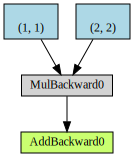

In [0]:
x = torch.ones(2, 2, requires_grad=True)
w = torch.rand(1, 1, requires_grad=True)
print(x)
print(w)
y = w * x + 2
print(y)
torchviz.make_dot(y)


## Playing with pytorch: linear regression

Code for plotting the surface

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_figs(fig_num, elev, azim, x, y, weights, bias):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)
    ax.scatter(x[:, 0], x[:, 1], y)
    ax.plot_surface(np.array([[0, 0], [1, 1]]),
                    np.array([[0, 1], [0, 1]]),
                    (np.dot(np.array([[0, 0, 1, 1],
                                          [0, 1, 0, 1]]).T, weights) + bias).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('y')
    
def plot_views(x, y, w, b):
    # Generate the different figures from different views
    elev = 43.5
    azim = -110
    plot_figs(1, elev, azim, x, y, w, b[0])

    plt.show()

Code for generating the 2D points

In [0]:
#Data generation (2D points)
w_source = torch.tensor([2., -3.], dtype=torch.float).view(-1,1)
b_source  = torch.tensor([1.], dtype=torch.float)

x = torch.empty(30, 2).uniform_(0, 1) # input of the regression model

print(x.shape)
print(w_source.shape)
print(b_source.shape)

y = torch.matmul(x,w_source)+b_source # output of the regression model
print(y.shape)

torch.Size([30, 2])
torch.Size([2, 1])
torch.Size([1])
torch.Size([30, 1])


Plot the dataset

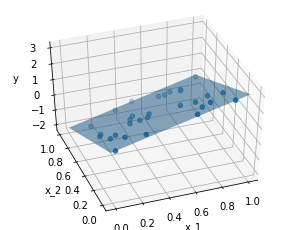

In [0]:
plot_views(x.numpy(), y.numpy(), w_source.numpy(), b_source.numpy())

In [0]:
print('w: ', w_source)
print('b: ', b_source)

w:  tensor([[ 2.],
        [-3.]])
b:  tensor([1.])


In [0]:
# randomly initialize learnable weights and bias
w_t_init = torch.empty(2, 1).uniform_(-1, 1) 
b_t_init = torch.empty(1, 1).uniform_(-1, 1)

print("Initial values of the parameters:")
print('w_init: ',w_t_init) 
print('b_init:', b_t_init)

Initial values of the parameters:
w_init:  tensor([[ 0.8421],
        [-0.3172]])
b_init: tensor([[-0.0884]])


### Question: calculate the gradient of the loss and code it.

Criterion to minimize:

$$
J(w_t,b_t)=\sum_{i=1}^{30}{(\hat{y}_i-y_i)}^2=\sum_{i=1}^{30}{(x_iw_t+b_t-y_i)}^2={\parallel x w_t+b_t 1_{30}-y\parallel}^2
$$

Gradient:

$$
\frac{\partial J(w_t,b_t)}{\partial w_t}=2x^Txw_t+2x^T 1_{30} b_t-2x^T y=2x^T(xw_t+1_{30} b_t-y)
$$

$$
\frac{\partial J(w_t,b_t)}{\partial b_t}=2\sum_{i=1}^{30}{(x_iw_t+b_t-y_i)}
$$


In [0]:
# our model forward pass
def forward_t(x):
    return x.mm(w_t)+b_t

# Loss function
def loss_t(x, y):
    y_pred = forward_t(x)
    return (y_pred - y).pow(2).sum()

# compute gradient
def gradient_t(x, y):  # d_loss/d_w, d_loss/d_c
    return 2*torch.mm(torch.t(x),x.mm(w_t)+b_t - y), 2 * (x.mm(w_t)+b_t - y).sum()

Main loop for computing the estimate (gradient descent)

### Question: code the gradient descent algorithm within the main loop.

In [0]:
learning_rate = 1e-2

w_t = w_t_init.clone()
b_t = b_t_init.clone()

for epoch in range(10):
    l = loss_t(x,y)
    grad_w, grad_b = gradient_t(x,y)
    # COMPLETE THE CELL FROM HERE
    # ...
    w_t = w_t-grad_w*learning_rate
    b_t = b_t-grad_b*learning_rate
    print("progress:", "epoch:", epoch, "loss",l)

progress: epoch: 0 loss tensor(23.8776)
progress: epoch: 1 loss tensor(19.1054)
progress: epoch: 2 loss tensor(17.4632)
progress: epoch: 3 loss tensor(15.9836)
progress: epoch: 4 loss tensor(14.6298)
progress: epoch: 5 loss tensor(13.3911)
progress: epoch: 6 loss tensor(12.2575)
progress: epoch: 7 loss tensor(11.2202)
progress: epoch: 8 loss tensor(10.2710)
progress: epoch: 9 loss tensor(9.4023)


In [0]:
# After training
print("Estimation of the parameters:")
print(w_t)
print(b_t)

Estimation of the parameters:
tensor([[ 1.3708],
        [-1.1972]])
tensor([[0.4055]])


### Question: Test a higger learning rate (e.g., learning_rate = 1). Explain what you observe.

**Answer:**

The learning rate is so big that the steps that we are not able to explore the area were the function reaches it's minimum.


In [0]:
learning_rate = 1

w_t = w_t_init.clone()
b_t = b_t_init.clone()

for epoch in range(100):
    l = loss_t(x,y)
    grad_w, grad_b = gradient_t(x,y)
    # COMPLETE THE CELL FROM HERE
    # ...
    w_t = w_t-grad_w*learning_rate
    b_t = b_t-grad_b*learning_rate

print("weight:", w_t, "bias: ",b_t)

weight: tensor([[nan],
        [nan]]) bias:  tensor([[nan]])


### Question: How to improve the quality of the estimate?

**Answer:**

Increasing the epochs.

In [0]:
learning_rate = 1e-2

# randomly initialize learnable weights and bias
w_t = torch.randn(2,1)
b_t = torch.randn(1,1)

for epoch in range(100):
    l = loss_t(x,y)
    grad_w, grad_b = gradient_t(x,y)
    # COMPLETE THE CELL FROM HERE
    # ...
    w_t = w_t-grad_w*learning_rate
    b_t = b_t-grad_b*learning_rate

print("Estimation of the parameters:")
print("weight:", w_t, "\n bias: ",b_t)

Estimation of the parameters:
weight: tensor([[ 1.9759],
        [-2.9518]]) 
 bias:  tensor([[0.9880]])
